### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [90]:
data = pd.read_csv('data/coupons.csv')

In [91]:
data.head(2)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0


2. Investigate the dataset for missing or problematic data.

<div style="border: 2px solid black; padding: 10px; width: 95%;  border-radius: 5px; color:blue">
<h3>Data cleanup strategy</h3>
<ul>
  <li>Look for null values in columns</li>
  <li>Look for null values in rows</li>
  <li>Look for duplicate rows</li>
  <li>Look for categorical values and decide if str should be converted to int</li>
</ul>
</div>

In [92]:
data.shape

(12684, 26)

<div style="border: 2px solid black; padding: 10px; width: 95%;  border-radius: 5px; color: blue">
Check the nulls in columns. Display only columns that have some null values. Display in %
</div>

In [93]:
data.isnull().mean().sort_values(ascending=False).loc[lambda x: x > 0] * 100

car                     99.148534
CoffeeHouse              1.710817
Restaurant20To50         1.490066
CarryAway                1.190476
RestaurantLessThan20     1.024913
Bar                      0.843582
dtype: float64

<div style="border: 2px solid black; padding: 10px; width: 95%;  border-radius: 5px; color: blue">
Check for rows with null in  columns related to frequency of visit and the %
</div>

In [94]:

null_rows = data[data[['CoffeeHouse','Restaurant20To50','CarryAway','RestaurantLessThan20','Bar']].isnull().any(axis=1)]
print (f' any null rows: {null_rows.shape}')


 any null rows: (605, 26)


In [95]:
percentage_null_rows = (null_rows.shape[0] / data.shape[0]) * 100
print(f'% of rows with Null: {percentage_null_rows}%')

% of rows with Null: 4.769788710186061%


<div style="border: 2px solid black; padding: 10px; width: 95%;  border-radius: 5px; color: blue">Check for duplicate rows</div>

In [96]:
dup_rows = data[data.duplicated()]
print(f'Number of duplicate rows: {dup_rows.shape[0]}')

Number of duplicate rows: 74


<div style="border: 2px solid black; padding: 10px; width: 95%;  border-radius: 5px; color: blue">
Check for columns that should be 'int' but are 'string'. Show all columns horizonally so no scrolling is needed.
</div>

In [97]:
pd.set_option('display.max_columns', None)
data.dtypes.to_frame().T

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,object,object,object,int64,object,object,object,object,object,object,int64,object,object,object,object,object,object,object,object,object,int64,int64,int64,int64,int64,int64


In [98]:
data['time'].value_counts()

time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64

In [99]:
data['age'].value_counts()

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

<div style="border: 2px solid black; padding: 10px; width: 95%;  border-radius: 5px; color:blue">
<h3>Data cleanup execution</h3>
<ul>
  <li>The car column is 99% null. Drop it.</li>
  <li>The null values in 'CoffeeHouse', 'Restaurant20To50', 'CarryAway', 'RestaurantLessThan20', 'Bar'= 4.7%. Since less than 5% of dataset, drop these rows.</li>
  <li>Drop 74 duplicate rows.</li>
  <li>Convert 'age' to numeric. Time is fine not expecting to do timediff etc.</li>

</ul>
</div>

In [100]:
pd.set_option('future.no_silent_downcasting', True) # This is to avoid the warning about downcasting
cols = ['CoffeeHouse', 'Restaurant20To50', 'CarryAway', 'RestaurantLessThan20', 'Bar']
data = data.dropna(subset=cols)
data['age'] = data['age'].replace({'below21': 20, '21': 21, '26': 26, '31': 31, '36': 36, '41': 41, '46': 46, '50plus': 50}).infer_objects(copy=False).astype('Int64')
data = data.drop('car', axis=1)
data = data.drop_duplicates()

print(data.shape)


(12007, 25)


4. What proportion of the total observations chose to accept the coupon?



In [101]:
accepted_coupns = data['Y'].mean() * 100
print(f'Accepted coupons: {accepted_coupns}%')

Accepted coupons: 56.84184225868244%


5. Use a bar plot to visualize the `coupon` column.

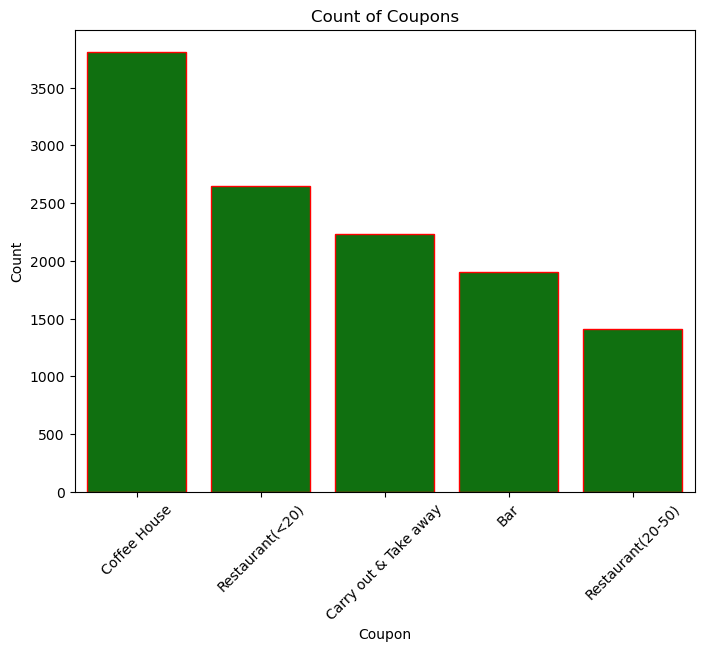

In [102]:
grouped_by_coupon = data.groupby('coupon').size().reset_index(name='count')
grouped_by_coupon = grouped_by_coupon.sort_values(by='count',ascending=False)
plt.figure(figsize=(8, 6))
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.title('Count of Coupons')
plt.xticks(rotation=45)
sns.barplot(x='coupon', y='count', data=grouped_by_coupon, color = 'green', edgecolor='red')
plt.show()

<div style="border: 2px solid black; padding: 10px; width: 95%;  border-radius: 5px; color: blue">
The bar plot shows that the most number of coupons accepted by drivers were coffee house coupons
</div>

6. Use a histogram to visualize the temperature column.

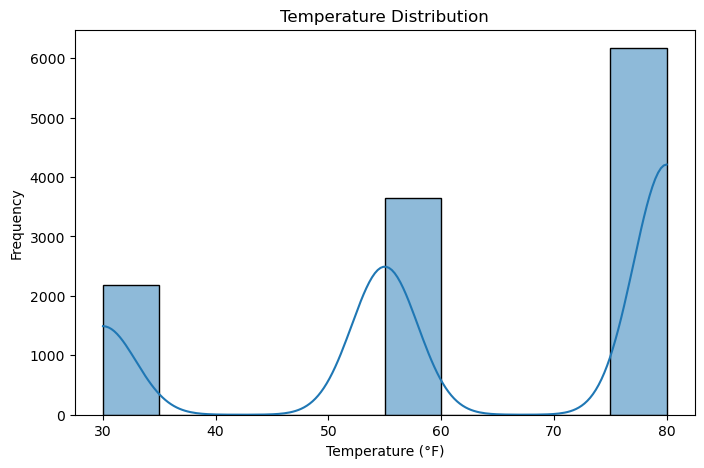

In [103]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='temperature', bins=10, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.show()

<div style="border: 2px solid black; padding: 10px; width: 95%;  border-radius: 5px; color: blue">
The histogram shows that there are three distinct temperature values 30F, 60F an 80F and 80F occurs the most in the dataset. The KDE (kernel Density Estimate)=True  gives the smooth line graph over the histogram to give an idea about temperature data distribution in the dataset.
</div>

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [104]:
df_bar = data[data['coupon'] == 'Bar'].copy()
print(df_bar.shape)

(1906, 25)


In [105]:
df_bar.head(2)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [106]:
accepted_bar_coupons = df_bar['Y'].mean()
print (f'Accepted bar coupons: {accepted_bar_coupons}')

Accepted bar coupons: 0.4118572927597062


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [107]:
df_bar['Bar'].value_counts()

Bar
never    788
less1    546
1~3      379
4~8      147
gt8       46
Name: count, dtype: int64

In [108]:
df_three_andless      = df_bar[df_bar['Bar'].isin(['never', 'less1', '1~3'])]
df_morethan_three     = df_bar[df_bar['Bar'].isin(['4~8', 'gt8'])]
accept_rate_lessthree = df_three_andless['Y'].mean() * 100
accept_rate_morethree = df_morethan_three['Y'].mean() * 100
print(f'Acceptance rate of those who went to bar 3 or less times  : {accept_rate_lessthree:.2f}%')
print(f'Acceptance rate of those who went to bar more than 3 times: {accept_rate_morethree :.2f}%')

Acceptance rate of those who went to bar 3 or less times  : 37.24%
Acceptance rate of those who went to bar more than 3 times: 76.17%


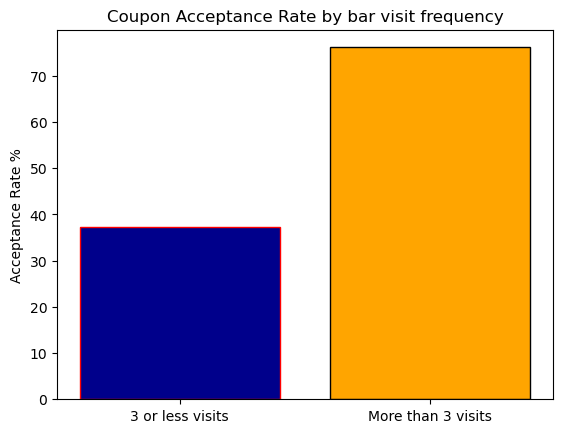

In [109]:
rates = [accept_rate_lessthree, accept_rate_morethree]
labels = ['3 or less visits', 'More than 3 visits']

plt.bar(labels, rates, color = ['darkblue', 'orange'], edgecolor = ['red', 'black'])
plt.ylabel('Acceptance Rate %')
plt.title('Coupon Acceptance Rate by bar visit frequency')

plt.show()

<div style="border: 2px solid black; padding: 10px; width: 95%;  border-radius: 5px; color: blue">
  The above barchart shows that drivers who vist bars more than 3 times has an acceptance rate (76%) which is more than twice that of drivers who visit bars 3 times or less (37%).
</div>

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [110]:
sel_criteria = (df_bar['Bar'].isin(['1~3', '4~8', 'gt8'])) & (df_bar['age'] > 25)
above_25 = df_bar[sel_criteria]['Y'].mean() * 100
others   = df_bar[~sel_criteria]['Y'].mean() * 100

print(f"Acceptance Rate: Bar more than once and above 25: {above_25:.2f}%")
print(f"Acceptance Rate: All Others: {others:.2f}%")

Acceptance Rate: Bar more than once and above 25: 68.98%
Acceptance Rate: All Others: 33.73%


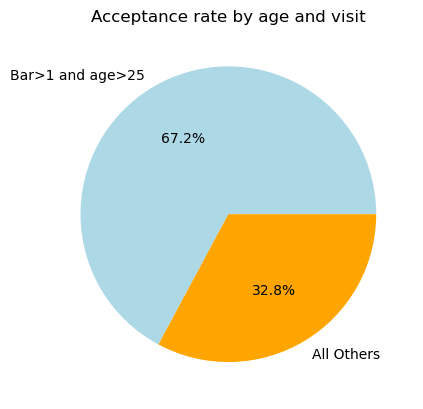

In [111]:
rates = [above_25, others]
labels = ['Bar>1 and age>25', 'All Others']
plt.pie(rates, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'orange'])
plt.title('Acceptance rate by age and visit')
plt.show()

<div style="border: 2px solid black; padding: 10px; width: 95%;  border-radius: 5px; color: blue">
    The above piechart shows that drivers who visit bars more than more than once and are above 25 years of age have a higher acceptance rate (67%) compared to others (32%)
</div>

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [112]:
df_bar['passanger'].value_counts()

passanger
Alone        1139
Friend(s)     316
Partner       259
Kid(s)        192
Name: count, dtype: int64

In [113]:
df_bar['occupation'].value_counts().to_frame().T

occupation,Unemployed,Student,Computer & Mathematical,Sales & Related,Education&Training&Library,Management,Office & Administrative Support,Arts Design Entertainment Sports & Media,Business & Financial,Retired,Healthcare Support,Food Preparation & Serving Related,Community & Social Services,Healthcare Practitioners & Technical,Transportation & Material Moving,Legal,Protective Service,Architecture & Engineering,Personal Care & Service,Construction & Extraction,Life Physical Social Science,Installation Maintenance & Repair,Production Occupations,Farming Fishing & Forestry,Building & Grounds Cleaning & Maintenance
count,292,237,222,175,125,104,101,88,82,71,44,43,40,36,35,34,27,27,25,24,24,18,16,9,7


In [114]:
sel_criteria = (df_bar['Bar'].isin(['1~3', '4~8', 'gt8'])) & (df_bar['passanger'] != 'Kid(s)') & (df_bar['occupation'] != 'Farming Fishing & Forestry')
no_kids  = df_bar[sel_criteria]['Y'].mean() * 100
others   = df_bar[~sel_criteria]['Y'].mean() * 100

print(f"Acceptance Rate: No kids, not Farming..: {no_kids:.2f}%")
print(f"Acceptance Rate: All Others: {others:.2f}%")

Acceptance Rate: No kids, not Farming..: 70.94%
Acceptance Rate: All Others: 29.72%


<div style="border: 2px solid black; padding: 10px; width: 95%;  border-radius: 5px; color: blue">
    Plot horizontal bar, countplot and violin plot  to compare further
</div>

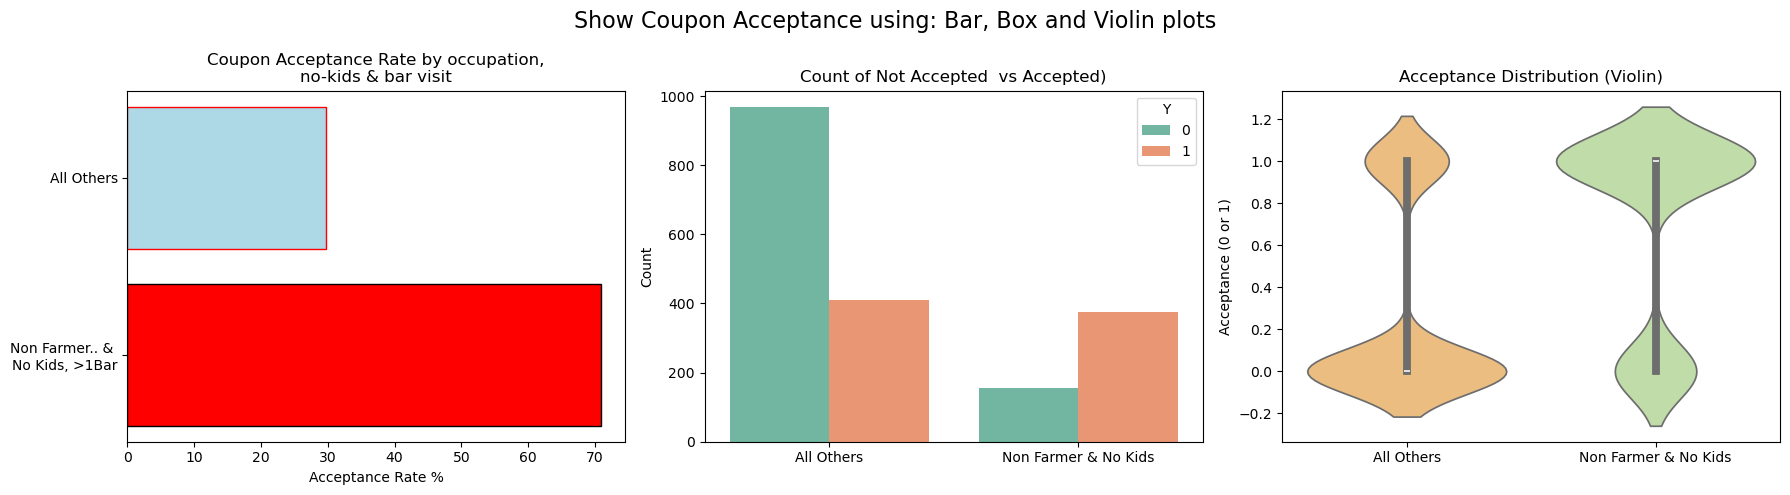

In [115]:
df_bar['group'] = 'All Others'
df_bar.loc[sel_criteria, 'group'] = 'Non Farmer & No Kids'
rates = [no_kids, others]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
labels = ['Non Farmer.. & \nNo Kids, >1Bar', 'All Others']
axes[0].barh(labels, rates, color=['red', 'lightblue'], edgecolor=['black', 'red'])
axes[0].set_xlabel('Acceptance Rate %')
axes[0].set_title('Coupon Acceptance Rate by occupation,\nno-kids & bar visit')

sns.countplot(data=df_bar, x='group', hue='Y', palette='Set2', ax=axes[1])
axes[1].set_title('Count of Not Accepted  vs Accepted)')
axes[1].set_xlabel('')
axes[1].set_ylabel('Count')

sns.violinplot(
    data=df_bar,
    x='group',
    y='Y',
    palette='Spectral',
    hue='group',
    ax=axes[2]
)
axes[2].set_title('Acceptance Distribution (Violin)')
axes[2].set_xlabel('')
axes[2].set_ylabel('Acceptance (0 or 1)')

plt.suptitle('Show Coupon Acceptance using: Bar, Box and Violin plots', fontsize=16)
plt.tight_layout()
plt.show()

<div style="border: 2px solid black; padding: 10px; width: 95%;  border-radius: 5px; color: blue">
    Above plots show in various ways that non-farmers with no kids who frequent bars more than once have a higher coupon acceptance rate than others.<br>
    <p>
    The violin plot also reinforces the same thing. The bulge near the top of green violin close to 1 shows more acceptance of non farmers with no kids compared to others where the bulge is near zero.
</div>

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [116]:
sel_critera1 = (df_bar['Bar'].isin(['1~3', '4~8', 'gt8'])) & (df_bar['passanger'] != 'Kid(s)') & (df_bar['maritalStatus'] != 'Widowed')
sel_critera2 = (df_bar['Bar'].isin(['1~3', '4~8', 'gt8'])) & (df_bar['age'] < 30)
sel_critera3 = (df_bar['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & (df_bar['income'].isin(['$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))
combine_sel  = sel_critera1 | sel_critera2 | sel_critera3
acceptance_rate_for_criteria = df_bar[combine_sel]['Y'].mean() * 100
others = df_bar[~combine_sel]['Y'].mean() * 100
print(f"Acceptance Rate: with criteria: {acceptance_rate_for_criteria:.2f}%")
print(f"Acceptance Rate: All Others: {others:.2f}%")


Acceptance Rate: with criteria: 61.15%
Acceptance Rate: All Others: 29.73%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

<div style="border: 2px solid black; padding: 10px; width: 95%;  border-radius: 5px; color: blue">
<h3>Finding and Observations - Bar coupon group</h3>
<table border="1" cellpadding="6" cellspacing="0" style="border-collapse: collapse; font-family: Arial, sans-serif; width: 90%;">
  <thead>
    <tr style="background-color: #f2f2f2; font-weight: bold; text-align: center;">
      <th style="text-align: left;">Selection Criteria</th>
      <th>Acceptance Rate (Criteria)</th>
      <th>Acceptance Rate (Others)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="text-align: left;">Overall Bar Coupons Accepted</td>
      <td colspan="2" style="background-color: #ffeeba; color: #856404; text-align: center;">41.19%</td>
    </tr>
    <tr>
      <td style="text-align: left;">Bar ≤3 times/month vs >3 times</td>
      <td style="background-color: #f8d7da; color: #721c24; text-align: center;">≤3 times: 37.24%</td>
      <td style="background-color: #d4edda; color: #155724; text-align: center;">>3 times: 76.17%</td>
    </tr>
    <tr>
      <td style="text-align: left;">Bar >1/month &amp; Age >25</td>
      <td style="background-color: #d4edda; color: #155724; text-align: center;">68.98%</td>
      <td style="background-color: #f8d7da; color: #721c24; text-align: center;">33.73%</td>
    </tr>
    <tr>
      <td style="text-align: left;">Bar >1/month, no kids, not Farming/Fishing/Forestry</td>
      <td style="background-color: #d4edda; color: #155724; text-align: center;">70.94%</td>
      <td style="background-color: #f8d7da; color: #721c24; text-align: center;">29.72%</td>
    </tr>
    <tr>
      <td style="text-align: left;">
        Bar >1/month, no kids, not widowed <br>
        OR Bar >1/month &lt;30 yrs <br>
        OR Cheap restaurants >4/month &amp; Income &lt;50K
      </td>
      <td style="background-color: #d4edda; color: #155724; text-align: center;">61.15%</td>
      <td style="background-color: #f8d7da; color: #721c24; text-align: center;">29.73%</td>
    </tr>
  </tbody>
</table>

<h3>Hypothesis about drivers who accepted the bar coupons</h3>
<ul>
  <li>Drivers who go to Bars more frequently accept more bar coupons (76.17%)</li>
  <li>Drivers above 25 who go to Bars, accept more bar coupons (68,98%)</li>
  <li>Drivers who have no kids and is not in farming or forestry accept more bar coupons(70.94%)</li>
  <li>Drivers who are not economically well off, goes to affordbale resturants and earns below 50K accept more coupons (61.15%)</li>
  <li>Only 41% of Bar coupons overall were accepted which is low. This could mean  that the coupon appeal is to a targeted group - younger, no kids, lower income, jobs in more urban settings and frequent Bar goers. </li>
</ul>
<h3>Recommendations</h3>
<ul>
  <li>Create a marketing campaign targeting young adult drivers who frequently go to bars, are not economically well off, do not have kid and are employed in more urban settings </li>
  <li>Make the bar coupon more attractive to low income earners by increasing the discount rate or by combining it with resturant discount offers.</li>
</ul>
</div>

## Additional analysis and hypothesis

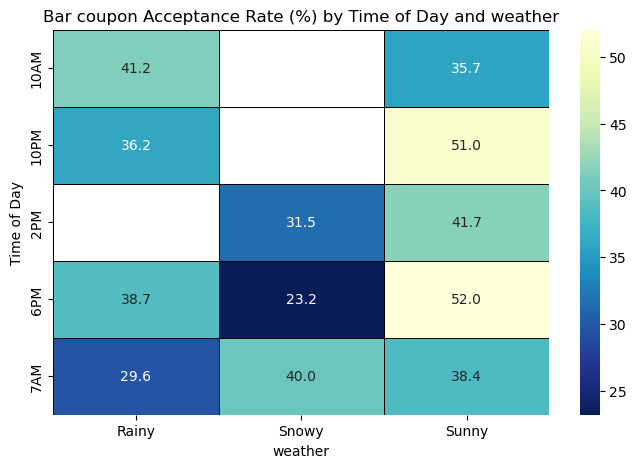

In [117]:
df_time_weather = df_bar.groupby(['time', 'weather'])['Y'].mean().unstack() * 100

plt.figure(figsize=(8,5))
sns.heatmap(df_time_weather, annot=True, fmt=".1f", cmap='YlGnBu_r', linecolor='black', linewidths=0.5)
plt.title('Bar coupon Acceptance Rate (%) by Time of Day and weather')
plt.ylabel('Time of Day')
plt.xlabel('weather')
plt.show()

<div style="border: 2px solid black; padding: 10px; width: 95%;  border-radius: 5px; color: blue">
    Base on the above heatmap  drivers who visit Bars in the evening in sunny weather, accept more Bar coupons. 
</div>

<div style="border: 2px solid black; padding: 10px; width: 95%;  border-radius: 5px; color:blue">
    Is there a relationship between 'Income' and 'Resturants below 20' for drivers who accepted bar coupons ?
</div>

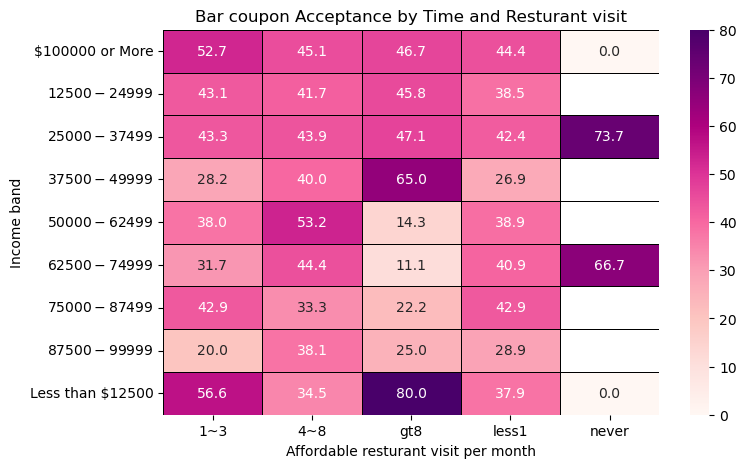

In [118]:
df_income_res = df_bar.groupby(['income', 'RestaurantLessThan20'])['Y'].mean().unstack() * 100

plt.figure(figsize=(8,5))
sns.heatmap(df_income_res, annot=True, fmt=".1f", cmap='RdPu', linecolor='black', linewidths=0.5)
plt.title('Bar coupon Acceptance by Time and Resturant visit')
plt.ylabel('Income band')
plt.xlabel('Affordable resturant visit per month')
plt.show()

<div style="border: 2px solid black; padding: 10px; width: 95%;  border-radius: 5px; color:blue">
    Low income drivers (income below $125k) who go to affordable resturants often (greater than 8 times per month) have a high bar coupon acceptance rate (80%)
</div>

<div style="border: 2px solid black; padding: 10px; width: 95%;  border-radius: 5px; color: blue">
<h3>Additional  Findings</h3>

<ul>
  <li>Drivers who drive in the evening (6PM - 10PM) in sunny weather, accept more Bar coupons.  </li>
  <li>Low income drivers (income below $125k) who go to affordable resturants often (greater than 8 times per month) have a high bar coupon acceptance rate (80%)</li>
  <li>High income Drivers ($100k and more) who go to affordable resturants at least 1 once a month,  have a consistantly high bar coupon acceptance rate (Range 44.4% - 52.7%)</li>
  
</ul>
</div>

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

<div style="border: 2px solid black; padding: 10px; width: 95%;  border-radius: 5px; color: blue">
<h3>I will explore <b>CoffeeHouse </b>coupon group - Why ?</h3>
<ul>
  <li>CoffeeHouse coupons are the highest accepted coupons among other coupon groups</li>
  <li>It would be interesting to know if time of day influences coffee drinkers</li>
  <li>Does time and destination influence coffee coupon acceptance ?</li>
  <li>Is coffee coupon acceptance influenced by time of day and marital status ?</li>
  <li>Is coffee coupon acceptance influenced by time of day and friends ?</li>
  <li>Finally, see how 'time', 'destination', 'passanger', 'weather', 'expiration',
        'gender', 'age', 'maritalStatus', 'education', 'income' combinations influence coffee coupon acceptance</li>
</ul>
</div>

<div style="border: 2px solid black; padding: 10px; width: 95%;  border-radius: 5px; color: blue">
    Create a new `DataFrame` that contains just the CoffeeHouse coupons.
</div>

In [119]:
df_coffee = data[data['coupon'] == 'Coffee House']
print(df_coffee.shape)

(3809, 25)


In [120]:
df_coffee.head(2)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,0


<div style="border: 2px solid black; padding: 10px; width: 95%;  border-radius: 5px; color: blue">
    What proportion of coupons were accepted ?
</div>

In [121]:
accepted_coffee_coupons = df_coffee['Y'].mean()
print (f'Accepted coffee coupons: {accepted_coffee_coupons}')

Accepted coffee coupons: 0.495668154371226


In [122]:
acceptance_rate_coffee = df_coffee.groupby('CoffeeHouse')['Y'].mean().reset_index(name='Acceptance Rate').sort_values(by='Acceptance Rate', ascending=False)
acceptance_rate_coffee['Acceptance Rate'] = acceptance_rate_coffee['Acceptance Rate'] * 100
print(acceptance_rate_coffee)

  CoffeeHouse  Acceptance Rate
1         4~8        68.244576
2         gt8        65.789474
0         1~3        64.729064
3       less1        47.950429
4       never        17.522321


<div style="border: 2px solid black; padding: 10px; width: 95%;  border-radius: 5px; color: blue">
    Visualization of Coupon acceptance by visit to coffee house
</div>

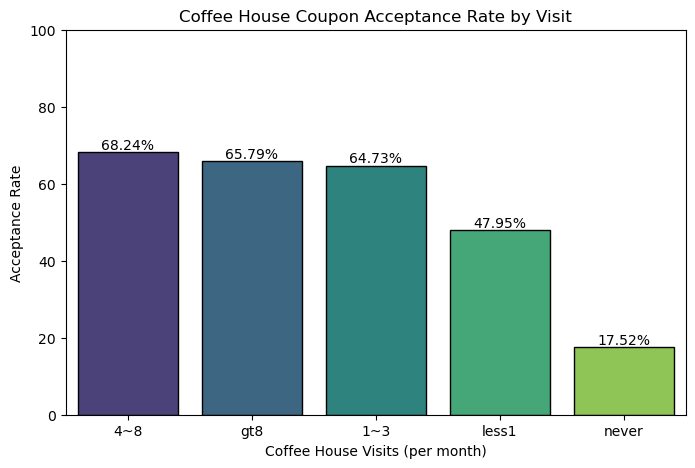

In [123]:
plt.figure(figsize=(8, 5))
bplot = sns.barplot(data=acceptance_rate_coffee, x='CoffeeHouse', y='Acceptance Rate', palette='viridis', hue='CoffeeHouse', edgecolor='black')
plt.title('Coffee House Coupon Acceptance Rate by Visit')
plt.xlabel('Coffee House Visits (per month)')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 100)
for container in bplot.containers:
    bplot.bar_label(container, fmt='%.2f%%') 
plt.show()

<div style="border: 2px solid black; padding: 10px; width: 95%;  border-radius: 5px; color: blue">
    From the above graph we see that frequent coffee house visitors (1 or more per month) accept more coupons(64.73% - 68.24%)
</div>

<div style="border: 2px solid black; padding: 10px; width: 95%;  border-radius: 5px; color: blue">
    Did the people who go to drink coffee during particular periods of the day accept more coupons ?
</div>

In [124]:
acceptance_rate_time = df_coffee.groupby('time')['Y'].mean().reset_index(name='acceptance_rate').sort_values(by='acceptance_rate', ascending=False)
acceptance_rate_time['acceptance_rate'] *= 100
acceptance_rate_time

,time,acceptance_rate
0,10AM,63.434579
2,2PM,54.485488
4,7AM,44.000000
1,10PM,42.907801
3,6PM,41.040462


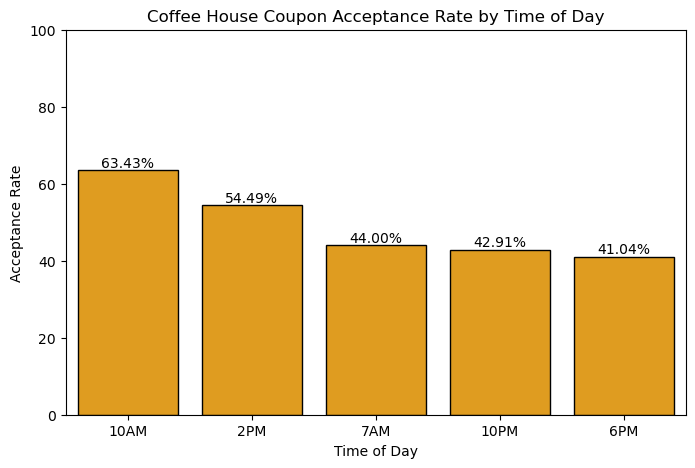

In [125]:
plt.figure(figsize=(8, 5))
bplot = sns.barplot(data=acceptance_rate_time,x='time', y='acceptance_rate', color = 'orange', edgecolor = 'black')
plt.title('Coffee House Coupon Acceptance Rate by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 100)
for container in bplot.containers:
    bplot.bar_label(container, fmt='%.2f%%') 
plt.show()

<div style="border: 2px solid black; padding: 10px; width: 95%;  border-radius: 5px; color: blue">
    From the above graph we see that morning coffee house visitors (10AM) have a higher coupon acceptance rate (63.43%)
</div>

<div style="border: 2px solid black; padding: 10px; width: 95%;  border-radius: 5px; color: blue">
    What is the effect of destination and time of day on coupon acceptance ?<p>
Let's explore with a heatmap
</div>

In [126]:
acceptance_time_destination = df_coffee.pivot_table(index='time',columns='destination',values='Y',aggfunc='mean') * 100
print(acceptance_time_destination)

destination       Home  No Urgent Place  Work
time                                         
10AM               NaN        63.434579   NaN
10PM         28.961749        68.686869   NaN
2PM                NaN        54.485488   NaN
6PM          38.122333        47.164179   NaN
7AM                NaN              NaN  44.0


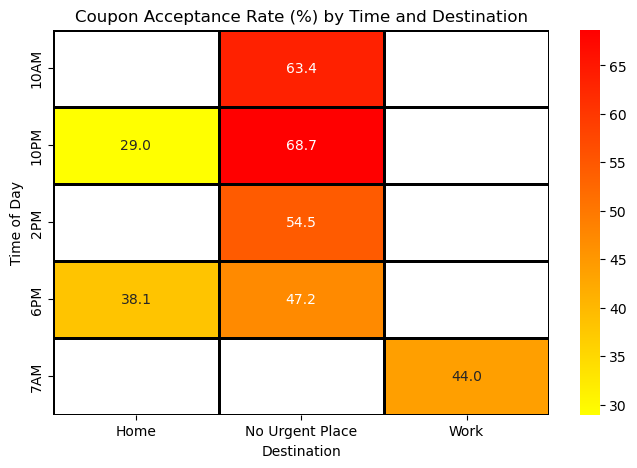

In [127]:
plt.figure(figsize=(8, 5))
sns.heatmap(acceptance_time_destination, annot=True, fmt=".1f", cmap='autumn_r', linecolor='black', linewidths=1)
plt.title('Coupon Acceptance Rate (%) by Time and Destination')
plt.xlabel('Destination')
plt.ylabel('Time of Day')
plt.show()

<div style="border: 2px solid black; padding: 10px; width: 95%;  border-radius: 5px; color: blue">Drivers who have no urgent place to go in the morning (10AM) or late evening (10PM) have higher coupon acceptance rates (63.4% - 68.7%)

<div style="border: 2px solid black; padding: 10px; width: 95%;  border-radius: 5px; color: blue">
Does marital status impact coupon acceptance ?
</div>

In [128]:
acceptance_time_maritalStatus = df_coffee.pivot_table(index='time',columns='maritalStatus', values='Y',aggfunc='mean') * 100  
print(acceptance_time_maritalStatus)

maritalStatus   Divorced  Married partner     Single  Unmarried partner  \
time                                                                      
10AM           65.625000        64.485981  62.962963          62.941176   
10PM           76.923077        36.000000  45.901639          39.534884   
2PM            60.869565        50.714286  59.393939          49.572650   
6PM            35.294118        41.706161  43.684211          36.410256   
7AM            41.463415        45.535714  43.401760          43.046358   

maritalStatus    Widowed  
time                      
10AM           44.444444  
10PM           50.000000  
2PM            37.500000  
6PM            14.285714  
7AM            33.333333  


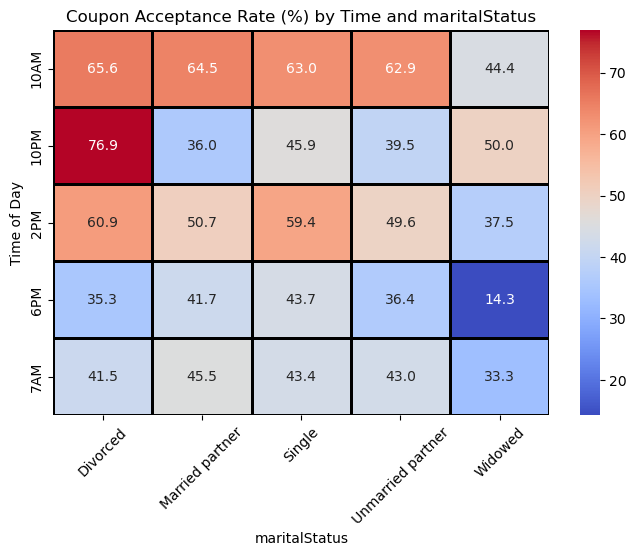

In [129]:
plt.figure(figsize=(8, 5))
sns.heatmap(acceptance_time_maritalStatus, annot=True, fmt=".1f", cmap='coolwarm',  linecolor='black', linewidths=1)
plt.title('Coupon Acceptance Rate (%) by Time and maritalStatus')
plt.xlabel('maritalStatus')
plt.ylabel('Time of Day')
plt.xticks(rotation=45)
plt.show()

<div style="border: 2px solid black; padding: 10px; width: 95%;  border-radius: 5px; color: blue">
    Irrespective of marital status, a high rate of acceptance(44.4% - 65.6%) among drivers who go to coffee houses in the morning (10AM).<p>
    Highest rate of acceptance (76.9%) is by divorced drivers who go to coffee houses late in the evening (10PM)
</div>

<div style="border: 2px solid black; padding: 10px; width: 95%;  border-radius: 5px; color: blue">
<h3>I would like to find out the top feature combinations like time, destination, passanger, weather... that accept coffee house coupons</h3>
<ul>
  <li>Group by all interesting features</li>
  <li>Calculate the mean and the count of rows</li>
  <li>Only consider counts greater than 5 [combinations with small counts (1,2,3,4.. )were showing up on top as 100%]</li>
  
</ul>
</div>

In [130]:
coffee_groups = df_coffee.groupby(['time', 'destination', 'passanger', 'weather', 'expiration','gender', 'age', 'maritalStatus', 'education', 'income'])
coffee_totals = coffee_groups.agg(acceptance_rate=('Y', 'mean'), count=('Y', 'size')).reset_index()
acceptance_combinations = coffee_totals.query('count >= 5').sort_values(by='acceptance_rate', ascending=False)
acceptance_combinations['acceptance_rate'] = acceptance_combinations['acceptance_rate'] * 100
print(acceptance_combinations.shape)
print(acceptance_combinations.head(3))

(11, 12)
     time      destination  passanger weather expiration  gender  age  \
950   2PM  No Urgent Place  Friend(s)   Sunny         1d  Female   21   
2380  7AM             Work      Alone   Sunny         1d  Female   31   
1073  2PM  No Urgent Place  Friend(s)   Sunny         1d    Male   21   

        maritalStatus                 education            income  \
950            Single  Some college - no degree  Less than $12500   
2380  Married partner  Some college - no degree   $100000 or More   
1073           Single  Some college - no degree   $100000 or More   

      acceptance_rate  count  
950             100.0      5  
2380             80.0      5  
1073             60.0      5  


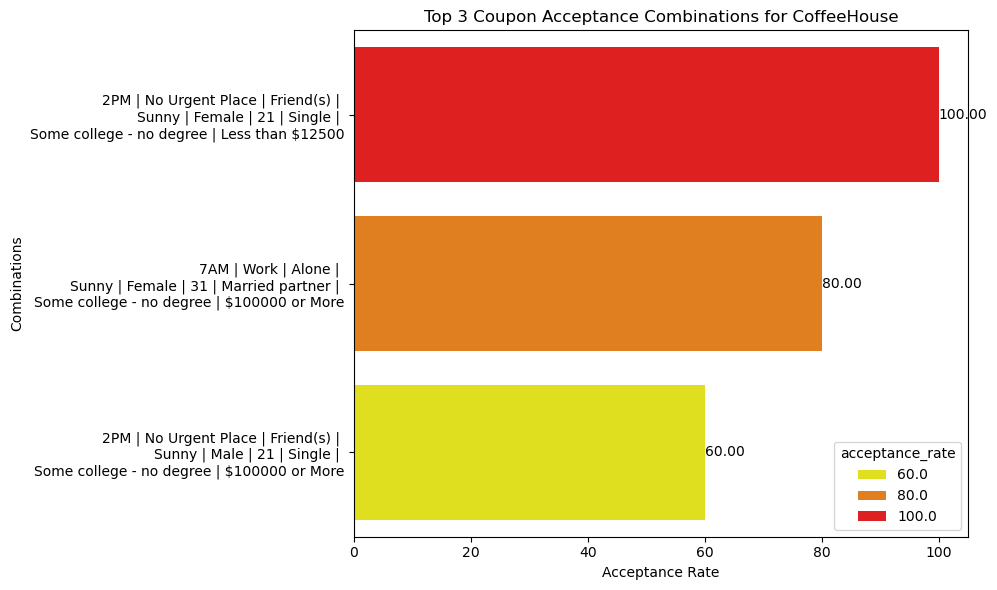

In [131]:
acceptance_combinations['label'] = (acceptance_combinations['time'] + ' | ' +acceptance_combinations['destination'] + ' | ' + acceptance_combinations['passanger'] + ' | ' + '\n' +
                                    acceptance_combinations['weather'] + ' | ' +acceptance_combinations['gender'] + ' | ' + acceptance_combinations['age'].astype(str) + ' | ' +
                                    acceptance_combinations['maritalStatus'] + ' | ' + '\n' +acceptance_combinations['education'] + ' | ' +acceptance_combinations['income']
)
top_three = acceptance_combinations.head(3)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_three, x='acceptance_rate', y='label', hue='acceptance_rate', palette='autumn_r')
plt.title('Top 3 Coupon Acceptance Combinations for CoffeeHouse')
plt.xlabel('Acceptance Rate')
plt.ylabel('Combinations')

for index, value in enumerate(top_three['acceptance_rate']):
    plt.text(value + 0.01, index, f"{value:.2f}", va='center')

plt.tight_layout()
plt.show()

<div style="border: 2px solid black; padding: 10px; width: 95%;  border-radius: 5px; color: blue">
Acceptance rate is highest among single female of 21 years with some college earning less than $12.5k goes to coffee house on a sunny day with friends with no particular end destination in mind.
</div>

<div style="border: 2px solid black; padding: 10px; width: 95%;  border-radius: 5px; color: blue"><b>Another observation:</b> I played around with the parameters and saw different results. Highlighting one: If I take minimum count of feature combination rows as > 6, I get highest 50% acceptance rate among single female of 21 years with some college degree and earning less than $12.5k who went to the coffee house early in the morning (7AM)on sunny days, alone and on the way to work !
</div>

<div style="border: 2px solid black; padding: 10px; width: 95%; border-radius: 5px; color:blue;">
  <h3>Observations and Findings - Coffee House coupon group</h3>

  <h4>Findings</h4>
  <p>
    Evaluate the acceptance rate of Coffee House coupons and identify the key factors (time, destination, marital status, and other attributes)
    that differentiate those who accepted vs. rejected the coupons.
  </p>

  <h4>Summary of Descriptive Statistics</h4>
  <table border="1" cellpadding="6" cellspacing="0" style="border-collapse: collapse; font-family: Arial, sans-serif; width: 95%;">
    <thead>
      <tr style="background-color: #f2f2f2; font-weight: bold; text-align: center;">
        <th style="text-align: left;">Evaluation Criteria</th>
        <th>Acceptance Rate (%)</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>Overall Coffee Coupon Acceptance</td>
        <td style="text-align: center; background-color: #d4edda; color: #155724;">49.5%</td>
      </tr>
      <tr>
        <td>By CoffeeHouse Visit</td>
        <td>
          <table border="1" cellpadding="6" cellspacing="0" style="border-collapse: collapse; font-family: Arial, sans-serif; width: 100%; text-align: center;">
    <thead>
      <tr style="background-color: #f2f2f2; font-weight: bold;">
        <th>CoffeeHouse Visits</th>
        <th>Acceptance Rate</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>4~8</td>
        <td>68.24%</td>
      </tr>
      <tr>
        <td>gt8</td>
        <td>65.79%</td>
      </tr>
      <tr>
        <td>1~3</td>
        <td>64.73%</td>
      </tr>
      <tr>
        <td>less1</td>
        <td>47.95%</td>
      </tr>
      <tr>
        <td>never</td>
        <td>17.52%</td>
      </tr>
    </tbody>
  </table>
        </td>
      </tr>
      <tr>
        <td>By Time of Visit</td>
        <td>
          <table border="1" cellpadding="6" cellspacing="0" style="border-collapse: collapse; font-family: Arial, sans-serif; width: 100%; text-align: center;">
    <thead>
      <tr style="background-color: #f2f2f2; font-weight: bold;">
        <th>Time</th>
        <th>Acceptance Rate</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>10AM</td>
        <td>63.43%</td>
      </tr>
      <tr>
        <td>2PM</td>
        <td>54.49%</td>
      </tr>
      <tr>
        <td>7AM</td>
        <td>44.00%</td>
      </tr>
      <tr>
        <td>10PM</td>
        <td>42.91%</td>
      </tr>
      <tr>
        <td>6PM</td>
        <td>41.04%</td>
      </tr>
    </tbody>
  </table>
        </td>
      </tr>
      <tr>
        <td>By Time of visit and Destination</td>
        <td>
    <table border="1" cellpadding="6" cellspacing="0" style="border-collapse: collapse; font-family: Arial, sans-serif; width: 100%; text-align: center;">
    <thead>
      <tr style="background-color: #f2f2f2; font-weight: bold;">
        <th>Time & Destination</th>
        <th>Acceptance Rate</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>10PM - No Urgent Place</td>
        <td>68.68%</td>
      </tr>
      <tr>
        <td>10AM - No Urgent Place</td>
        <td>63.43%</td>
      </tr>
      <tr>
        <td>2PM - No Urgent Place</td>
        <td>58.48%</td>
      </tr>
      <tr>
        <td>6PM - No Urgent Place</td>
        <td>47.16%</td>
      </tr>
      <tr>
        <td>7AM - Work</td>
        <td>44.00%</td>
      </tr>
      <tr>
        <td>6PM - Home</td>
        <td>38.12%</td>
      </tr>
      <tr>
        <td>10PM - Home</td>
        <td>28.96%</td>
      </tr>
     </tbody>
  </table>
        </td>
      </tr>
      <tr>
        <td>By Time of day and Marital Status</td>
        <td>
            <table border="1" cellpadding="6" cellspacing="0" style="border-collapse: collapse; font-family: Arial, sans-serif; width: 90%; text-align: center;">
    <thead>
      <tr style="background-color: #f2f2f2; font-weight: bold;">
        <th style="text-align: left;">Time</th>
        <th>Divorced</th>
        <th>Married Partner</th>
        <th>Single</th>
        <th>Unmarried Partner</th>
        <th>Widowed</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td style="text-align: left;">10AM</td>
        <td>65.63%</td>
        <td>64.49%</td>
        <td>62.96%</td>
        <td>62.94%</td>
        <td>44.44%</td>
      </tr>
      <tr>
        <td style="text-align: left;">10PM</td>
        <td>76.92%</td>
        <td>36.00%</td>
        <td>45.90%</td>
        <td>39.53%</td>
        <td>50.00%</td>
      </tr>
      <tr>
        <td style="text-align: left;">2PM</td>
        <td>60.87%</td>
        <td>50.71%</td>
        <td>59.39%</td>
        <td>49.57%</td>
        <td>37.50%</td>
      </tr>
      <tr>
        <td style="text-align: left;">6PM</td>
        <td>35.29%</td>
        <td>41.71%</td>
        <td>43.68%</td>
        <td>36.41%</td>
        <td>14.29%</td>
      </tr>
      <tr>
        <td style="text-align: left;">7AM</td>
        <td>41.46%</td>
        <td>45.54%</td>
        <td>43.40%</td>
        <td>43.05%</td>
        <td>33.33%</td>
      </tr>
    </tbody>
  </table>
        </td>
      </tr>
    </tbody>
  </table>

  <h4>Key Findings</h4>
  <ul>
    <li>Overall 49.5% of coffee house coupons were accepted. This shows that overall, drivers were interested in Coffee House coupons</li>
    <li>Frequent coffee house visitors (1 or more per month) accepted more coupons(64.73% - 68.24%)</li>
    <li>Morning coffee house visitors (10AM) have a higher coupon acceptance rate (63.43%).</li>
    <li>Irrespective of marital status, a high rate of acceptance(44.4% - 65.6%) among drivers who go to coffee houses in the morning (10AM).
    Highest rate of acceptance (76.9%) is by divorced drivers who go to coffee houses late in the evening (10PM)</li>
    <li>Drivers who have no urgent place to go in the morning (10AM) or late evening (10PM) have higher coupon acceptance rates (63.4% - 68.7%)</li>
    <li>Young single females divers with some college earning less than $12.5k who went to coffee houses in the afternoon accepted coffee coupons at the highest rate</li>
  </ul>

  <h4>Next Steps and Recommendations</h4>
  <ul>
    <li>Run a targeted marketing campaign focused on young female drivers, drivers who frequented coffee houses often and drives to nowhere particular and divorcees who go to coffee houses late in the eventings</li>
    
  </ul>
</div>
